In [1]:
from sea_breeze import load_model_data
from dask.distributed import Client
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [2]:
client = Client()
client

2025-01-15 10:06:50,551 - distributed.preloading - INFO - Creating preload: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
2025-01-15 10:06:50,555 - distributed.utils - INFO - Reload module schedplugin from .py file
2025-01-15 10:06:50,559 - distributed.preloading - INFO - Import preload module: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py


Modifying workers


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-bdw-0017.gadi.nci.org.au/19310/proxy/8787/status,
Dashboard: /node/gadi-cpu-bdw-0017.gadi.nci.org.au/19310/proxy/8787/status,Workers: 7
Total threads: 7,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36883,Workers: 7
Dashboard: /node/gadi-cpu-bdw-0017.gadi.nci.org.au/19310/proxy/8787/status,Total threads: 7
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:42889,Total threads: 1
Dashboard: /node/gadi-cpu-bdw-0017.gadi.nci.org.au/19310/proxy/40629/status,Memory: 0 B
Nanny: tcp://127.0.0.1:40067,


In [3]:
lat_slice = slice(-44,-40)
lon_slice = slice(144,149)

INFO: Take the weighted mean and convert complex numbers to an angle and magnitude...
INFO: Calculating the sum of the weights...
INFO: Calculating variance...
INFO: Calculating minimum distance to the coast...


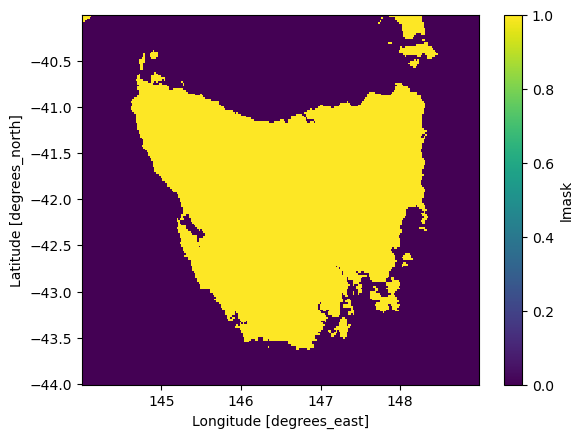

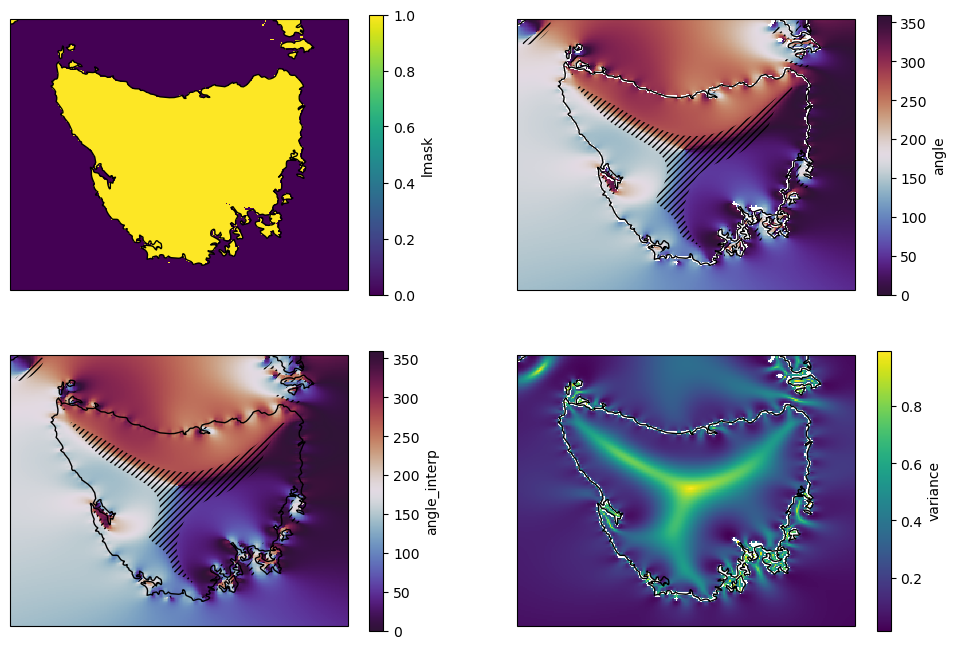

In [21]:
#Load land sea mask and compute coastline angles
orog, lsm = load_model_data.load_aus2200_static(
    "mjo-elnino",
    lon_slice,
    lat_slice)

angle_ds = load_model_data.get_coastline_angle_kernel(
    lsm,
    R=4,
    compute=True)

plt.figure(figsize=[12,8])
ax = plt.subplot(2,2,1,projection=ccrs.PlateCarree())
lsm.plot()
ax.coastlines()
ax = plt.subplot(2,2,2,projection=ccrs.PlateCarree())
angle_ds.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,3,projection=ccrs.PlateCarree())
angle_ds.angle_interp.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,4,projection=ccrs.PlateCarree())
angle_ds.variance.plot()
ax.coastlines()

INFO: Take the weighted mean and convert complex numbers to an angle and magnitude...
INFO: Calculating the sum of the weights...
INFO: Calculating variance...
INFO: Calculating minimum distance to the coast...


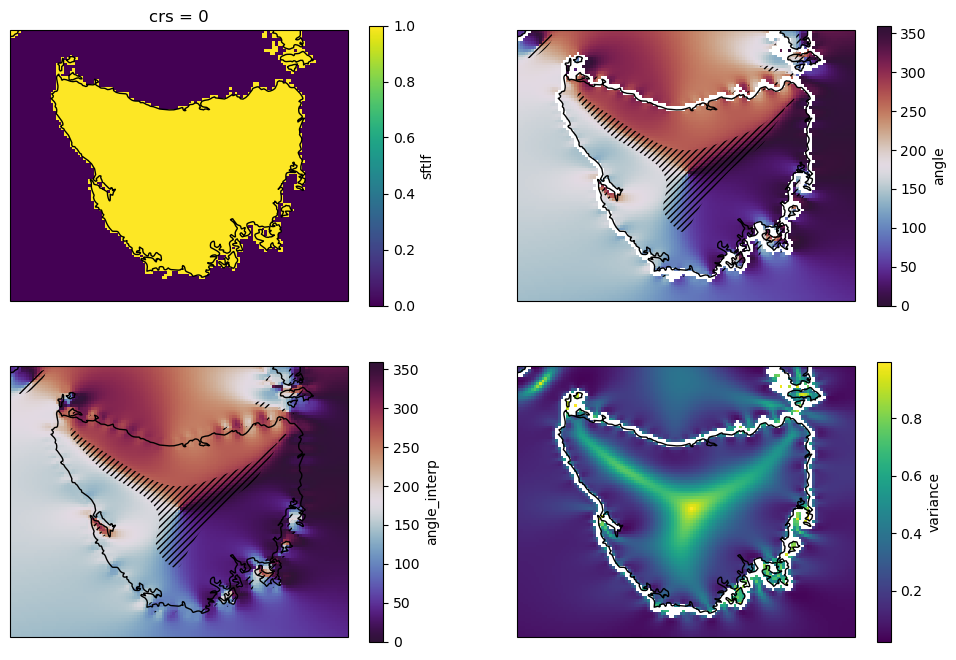

In [20]:
_, lsm = load_model_data.load_barra_static("AUST-04",lon_slice,lat_slice)
angle_ds = load_model_data.get_coastline_angle_kernel(
    lsm,
    R=8,
    compute=True)

plt.figure(figsize=[12,8])
ax = plt.subplot(2,2,1,projection=ccrs.PlateCarree())
lsm.plot()
ax.coastlines()
ax = plt.subplot(2,2,2,projection=ccrs.PlateCarree())
angle_ds.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,3,projection=ccrs.PlateCarree())
angle_ds.angle_interp.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,4,projection=ccrs.PlateCarree())
angle_ds.variance.plot()
ax.coastlines()

INFO: Take the weighted mean and convert complex numbers to an angle and magnitude...
INFO: Calculating the sum of the weights...
INFO: Calculating variance...
INFO: Calculating minimum distance to the coast...


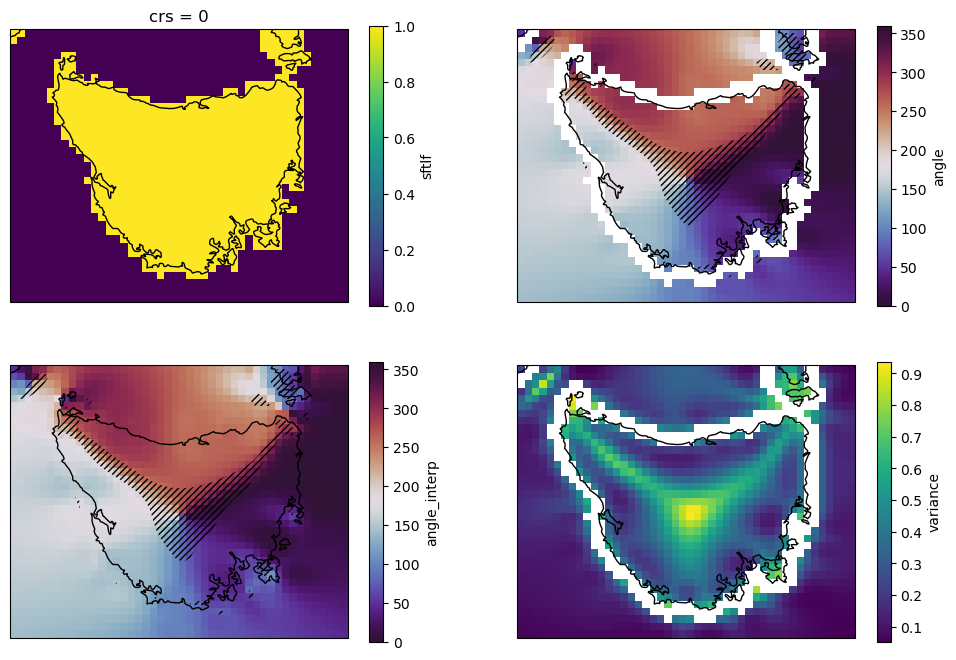

In [42]:
_, lsm = load_model_data.load_barra_static("AUS-11",lon_slice,lat_slice)
angle_ds = load_model_data.get_coastline_angle_kernel(
    lsm,
    R=30,
    compute=True)

plt.figure(figsize=[12,8])
ax = plt.subplot(2,2,1,projection=ccrs.PlateCarree())
lsm.plot()
ax.coastlines()
ax = plt.subplot(2,2,2,projection=ccrs.PlateCarree())
angle_ds.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,3,projection=ccrs.PlateCarree())
angle_ds.angle_interp.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,4,projection=ccrs.PlateCarree())
angle_ds.variance.plot()
ax.coastlines()

INFO: Take the weighted mean and convert complex numbers to an angle and magnitude...
INFO: Calculating the sum of the weights...
INFO: Calculating variance...
INFO: Calculating minimum distance to the coast...


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in power
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in power
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in power
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in power
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
 

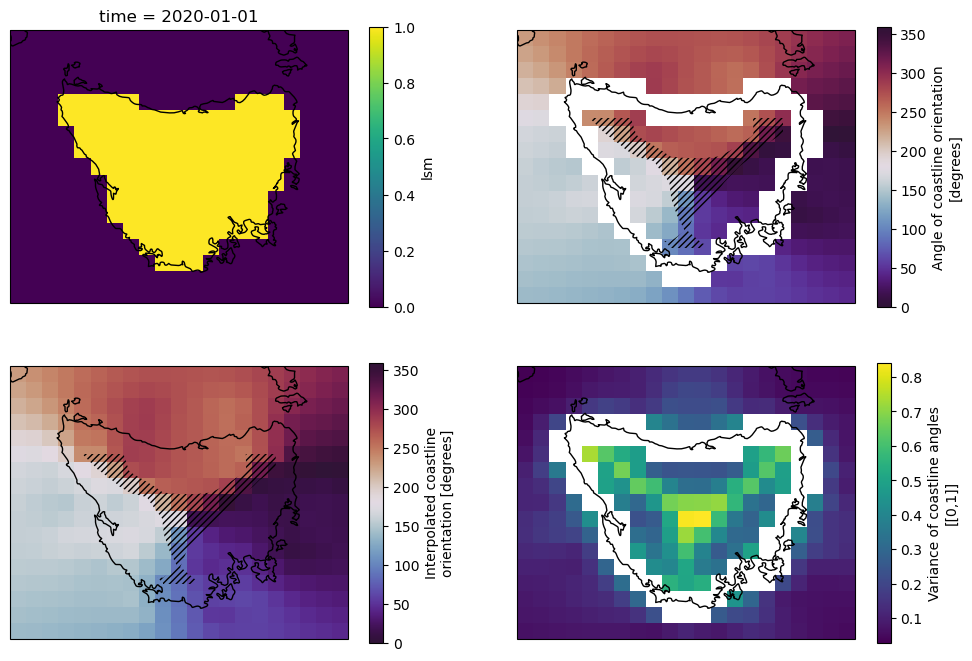

In [4]:
orog, lsm, _ = load_model_data.load_era5_static(
    lon_slice,
    lat_slice,
    "2020-01-01 00:00",
    "2020-01-01 00:00")

angle_ds = load_model_data.get_coastline_angle_kernel(
    lsm,
    R=50,
    compute=True)

plt.figure(figsize=[12,8])
ax = plt.subplot(2,2,1,projection=ccrs.PlateCarree())
lsm.plot()
ax.coastlines()
ax = plt.subplot(2,2,2,projection=ccrs.PlateCarree())
angle_ds.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,3,projection=ccrs.PlateCarree())
angle_ds.angle_interp.plot(cmap="twilight_shifted",vmin=0,vmax=360)
xr.plot.contourf(angle_ds.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
ax = plt.subplot(2,2,4,projection=ccrs.PlateCarree())
angle_ds.variance.plot()
ax.coastlines()